In [57]:
#This code snippet demonstrates how a DecisionTreeRegression classifer compares to linear regression for predicting mpg where the purple line is linear regression and the red line is a tree classifier

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.model_selection import train_test_split

     MPG          Make             Model  Displacement  Horse Power  \
0   18.8  Aston Martin              DB11           5.2          600   
2   22.7  Aston Martin           DB11 V8           4.0          503   
4   17.7  Aston Martin               DBS           5.2          715   
6   22.5  Aston Martin        Vantage V8           4.0          503   
14  28.6           BMW  230i Convertible           2.0          248   

    Cylinders  Number_Of_Gears  Weight  Test Procedure Cd  
0        12.0                8    4500                 21  
2         8.0                8    4500                 21  
4        12.0                8    4500                 21  
6         8.0                8    4000                 21  
14        4.0                8    4000                 21  


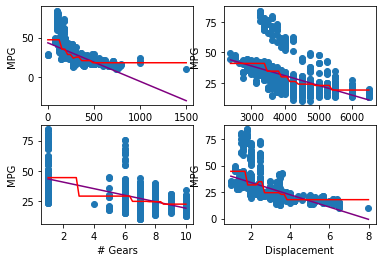

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/cars_mpg_tree_classifiers.csv",usecols=["MPG","Make","Model","Displacement","Horse Power","Cylinders","Number_Of_Gears","Weight","Test Procedure Cd"])
df=df[df["Test Procedure Cd"]==21]
print(df.head(5))

dt=DecisionTreeRegressor(max_depth=8,
	min_samples_leaf=0.1,  #each leaf must contain 10% of the training data
	random_state=3)

reg=LinearRegression()

X_horsePower=np.array(df["Horse Power"]).reshape(-1,1)
y_mpg=np.array(df["MPG"])

reg.fit(X_horsePower,y_mpg)
prediction_space=np.linspace(min(X_horsePower),max(X_horsePower)).reshape(-1,1)
fig, ax= plt.subplots(2,2)
ax[0,0].scatter(df["Horse Power"],y_mpg)
ax[0,0].set_xlabel('Horse Power')
ax[0,0].set_ylabel('MPG')

X_train, X_test,y_train,y_test=train_test_split(X_horsePower,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
#y_prediction=regression.predict(X_test)
ax[0,0].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[0,0].plot(prediction_space, dt.predict(prediction_space), c="Red")

X_weight=np.array(df["Weight"]).reshape(-1,1)
prediction_space=np.linspace(min(X_weight),max(X_weight)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_weight,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
ax[0,1].scatter(pd.Series(df["Weight"]),y_mpg)
ax[0,1].set_xlabel('Weight')
ax[0,1].set_ylabel('MPG')
ax[0,1].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[0,1].plot(prediction_space, dt.predict(prediction_space), c="Red")

X_gears=np.array(df["Number_Of_Gears"]).reshape(-1,1)
prediction_space=np.linspace(min(X_gears),max(X_gears)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_gears,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)

ax[1,0].scatter(pd.Series(df["Number_Of_Gears"]),y_mpg)
ax[1,0].set_xlabel('# Gears')
ax[1,0].set_ylabel('MPG')
ax[1,0].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[1,0].plot(prediction_space, dt.predict(prediction_space), c="Red")

X_displacement=np.array(df["Displacement"]).reshape(-1,1)
prediction_space=np.linspace(min(X_gears),max(X_displacement)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_displacement,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)

ax[1,1].scatter(pd.Series(df["Displacement"]),y_mpg)
ax[1,1].set_xlabel('Displacement')
ax[1,1].set_ylabel('MPG')
ax[1,1].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[1,1].plot(prediction_space, dt.predict(prediction_space), c="Red")

plt.show()